In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [4]:
data = pd.read_csv("Mall_Customers.csv")
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


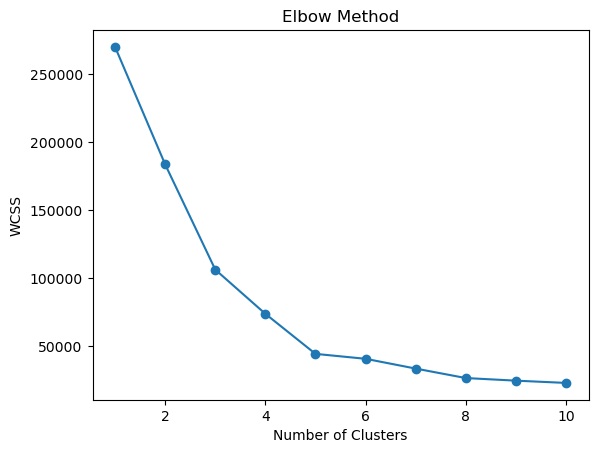

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [10]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

data["Cluster"] = y_kmeans
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


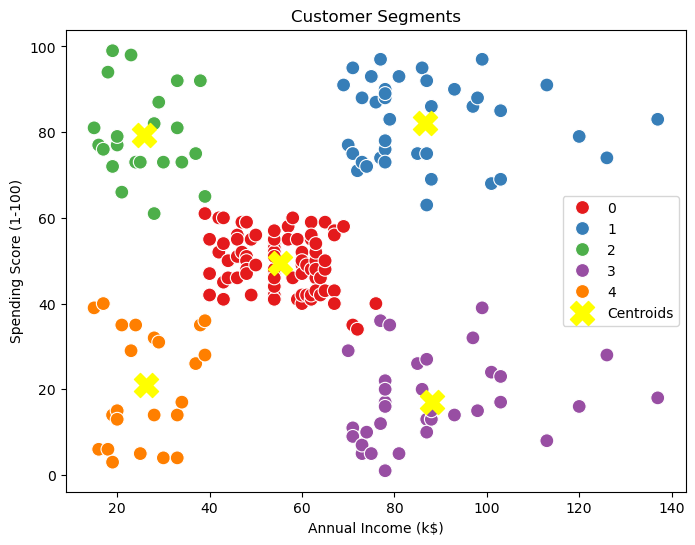

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)", 
    y="Spending Score (1-100)", 
    hue="Cluster", 
    data=data, 
    palette="Set1", 
    s=100
)
plt.scatter(
    kmeans.cluster_centers_[:,0], 
    kmeans.cluster_centers_[:,1], 
    s=300, c="yellow", marker="X", label="Centroids"
)
plt.title("Customer Segments")
plt.legend()
plt.show()
